# Tittle: Heart Disease Prediction
`Author:` [Muhammad Anas]\
`Date:` 2-Aug-2024\
`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download)


## Meta-Data (About Dataset)
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
1. `id` (Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. `chol` (serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9. `restecg` (resting electrocardiographic results)
10. -- `Values`: [normal, stt abnormality, lv hypertrophy]
11. `thalach:` maximum heart rate achieved
12. `exang:` exercise-induced angina (True/ False)
13. `oldpeak:` ST depression induced by exercise relative to rest
14. `slope:` the slope of the peak exercise ST segment
15. `slope:` the slope of the peak exercise ST segment
16. `ca:` number of major vessels (0-3) colored by fluoroscopy
17. `thal:` [normal; fixed defect; reversible defect]
18. `num:` the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). 
* International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 


**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims and Objects
We fill this after Exploratry Data Analysis (EDA).

### Import the libraries
Let's start the project by importing all the libraries which we need in this Project. 

In [2]:
#Import the Libraries:
import pandas as pd
import numpy as np
#To visullization the data:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#Import the machine learning libraries from scikit-learn as sklearn:
#Preprocess data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#Imputer for data:
from sklearn.impute import SimpleImputer, KNNImputer
#Import iteravtive imputer:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#Machine Learning modeling:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#Import the Classification models for dataset:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
#For classification task import evalution methods(mertics):
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

#Ignore warnings:
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [3]:
#Load the dataset:
df = pd.read_csv('heart_disease_uci.csv')
#Check the first 5 rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore each Column

In [4]:
#Summerization of data:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
#Exploraring the each type of data columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
#Check the shape of data:
df.shape

(920, 16)

In [7]:
#Check the column of id:
df['id'].nunique()
#Also check the minimum and maximum value:
df['id'].min(), df['id'].max()

(np.int64(1), np.int64(920))

### Explore of column of age:

In [8]:
#To suumerize the column of age:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [9]:
#Check the age column:
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

<Axes: xlabel='age', ylabel='Count'>

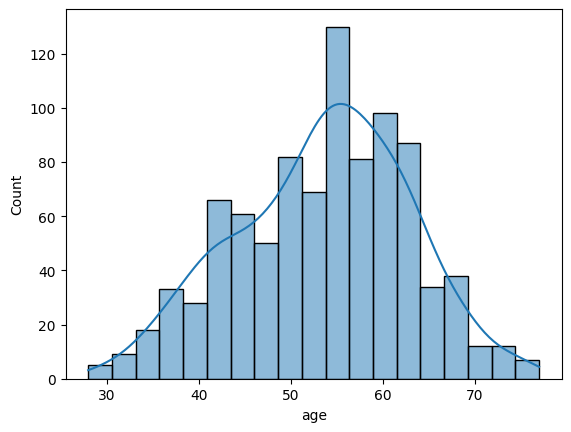

In [10]:
#Make a plot of age column, to check the data distribution with histgram plot:
sns.histplot(data=df, x='age', kde=True)

Mean of age data:  53.51086956521739
Median of age data:  54.0
Mode of age data:  54


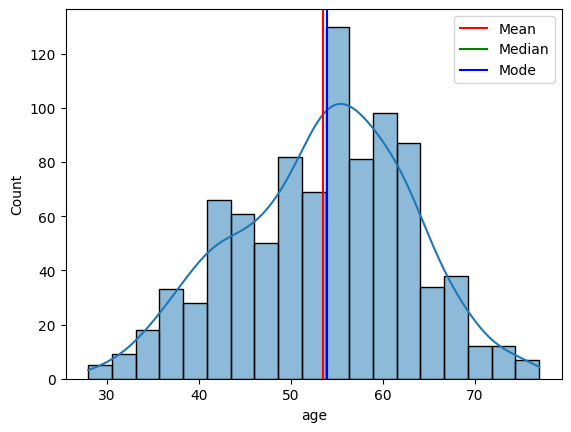

In [11]:
#To see the mean, median and mode of age data:
print("Mean of age data: ", df['age'].mean())
print("Median of age data: ", df['age'].median())
print("Mode of age data: ", df['age'].mode()[0])
#Make a histogram of age column with mean, median and mode values:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.axvline(df['age'].median(), color='green', label='Median')
plt.axvline(df['age'].mode()[0], color='blue', label='Mode')
plt.legend()


### Explore the column of sex:

In [12]:
#Let explore the age column data distribution with gender (sex), using plotly with color sex:
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [13]:
#Value count of sex column:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [14]:
#Differece between to values with percetage:
male_count = 726
female_count = 194
#Total count:
total_count = male_count + female_count
#calculate percentages:
male_per = (male_count/total_count)*100
print(f"Total Percentage of Male Heart diseases: {male_per:.2f}%")
female_per = (female_count/total_count)*100
print(f"Total Percentage of Female Heart diseases: {female_per:.2f}%")
#Percentage difference between the Male and Female:
differ_per = ((male_count-female_count)/female_count)*100 
print(f"The percentage of Male {differ_per:.2f}%, more then Female")


Total Percentage of Male Heart diseases: 78.91%
Total Percentage of Female Heart diseases: 21.09%
The percentage of Male 274.23%, more then Female


In [15]:
# Now we find the value count of age with sex to calculate the value:
value_count = df.groupby('sex')['age'].value_counts().sort_values(ascending=False)
print(value_count)  

sex     age
Male    58     36
        54     36
        55     34
        56     33
        59     32
               ..
Female  68      1
Male    28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64


### Explore the column of dataset:

In [16]:
#Deal with dataset column:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [17]:
#Find unique values counts in dataset:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [18]:
#Make a count plot of dataset:
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [19]:
#Make a value count with sex :
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [20]:
#Make a histogram with plotly:
fig = px.histogram(df, x='age', color='dataset')
fig.show()

In [21]:
#Print the mean, median and mode of age groupby dataset: 
print("Median of dataset: ",df.groupby('dataset')['age'].median())
print("===========================================")
print("Mean of dataset: ",df.groupby('dataset')['age'].mean())
print("============================================")
print("Mode of dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))

Median of dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mean of dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Mode of dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [22]:
#Group the dataset with age:
df.groupby('dataset')['age'].value_counts()

dataset        age
Cleveland      58     19
               57     17
               54     16
               59     14
               52     13
                      ..
VA Long Beach  44      1
               45      1
               70      1
               76      1
               77      1
Name: count, Length: 155, dtype: int64

### Let's explore the cp (Chest Pain) colum:

In [23]:
#Value count of cp column:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [24]:
#Make a plot with ploty of cp with age :
fig = px.histogram(df, x='age', color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

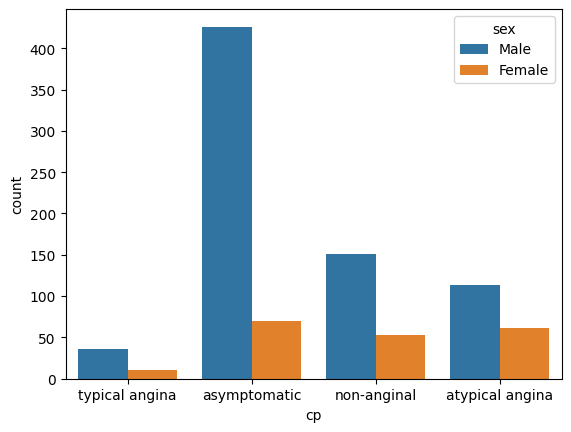

In [25]:
#Make a countplot of cp with sex:
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

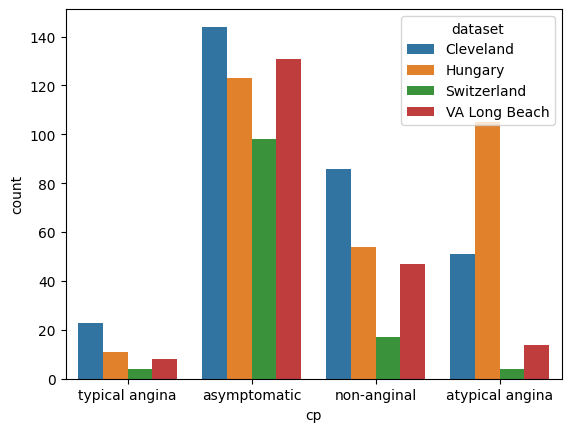

In [26]:
#Make a countplot of cp with dataset:
sns.countplot(data=df, x='cp', hue='dataset')

In [27]:
#Make a groupby column with age:
df.groupby('cp')['age'].value_counts()

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
typical angina  60      1
                63      1
                66      1
                68      1
                74      1
Name: count, Length: 156, dtype: int64

### Eplore the trestbps (resting blood pressure) column:
- The normal blood pressure of body is 120/80 mm Hg.
- `Write what will happend, if the blood pressure is high or low and then we bin the data on results `

In [28]:
#To discribe the column of trestbps:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

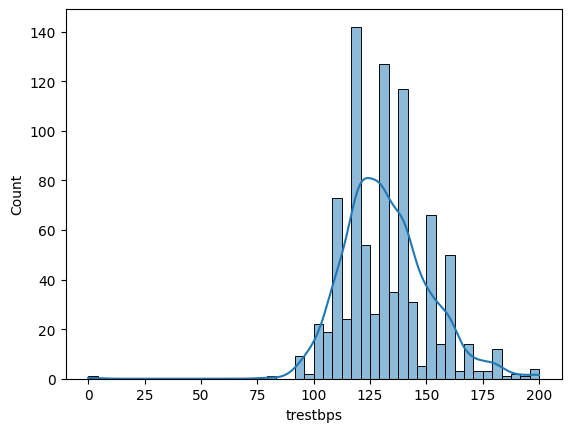

In [29]:
#To check the value of blood pressure:
sns.histplot(data=df, x='trestbps', kde=True)

In [30]:
#Deal with missing values in trestbps column:
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


In [31]:
#Impute the missing values in trestbps column using Iterative Imputer:
iter_imp = IterativeImputer(max_iter=10, random_state=42)
#fit the model:
iter_imp.fit(df[['trestbps']])
#transform the data:
df['trestbps'] = iter_imp.fit_transform(df[['trestbps']])
#Check the missing values:
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Percentage of missing values in trestbps column: 0


------

### Dealing with Missing values in dataset:

In [32]:
#Check the all missing values in dataset:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
trestbps     0.000000
cp           0.000000
dataset      0.000000
age          0.000000
id           0.000000
sex          0.000000
num          0.000000
dtype: float64

In [33]:
#Check the column of thal:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [34]:
#Check the thal column with mssing values:
print(f"The number of missing values in Thal column: {df['thal'].isnull().sum()}")

The number of missing values in Thal column: 486


In [35]:
#Check the mssing values greater then zero.
missing_col = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
print(missing_col)

ca         611
thal       486
slope      309
fbs         90
oldpeak     62
exang       55
thalch      55
chol        30
restecg      2
dtype: int64


In [36]:
#Check the data info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [37]:
#Check again the missing values:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
thalch       55
exang        55
chol         30
restecg       2
trestbps      0
cp            0
dataset       0
age           0
id            0
sex           0
num           0
dtype: int64

In [38]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [39]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [40]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()
    
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
      pass
    
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [41]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values chol : 3.26%
MAE = 45.29488764044944 

RMSE = 63.587324248282215 

R2 = 0.6796979294923283 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.59150289017341 

RMSE = 21.711882724560915 

R2 = 0.3145365814081187 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 81.5 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.576156976744186 

RMSE = 0.8051262251175855 

R2 = 0.38243042533862637 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy



In [42]:
#Check the info of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Dealing with Outliers in dataset:

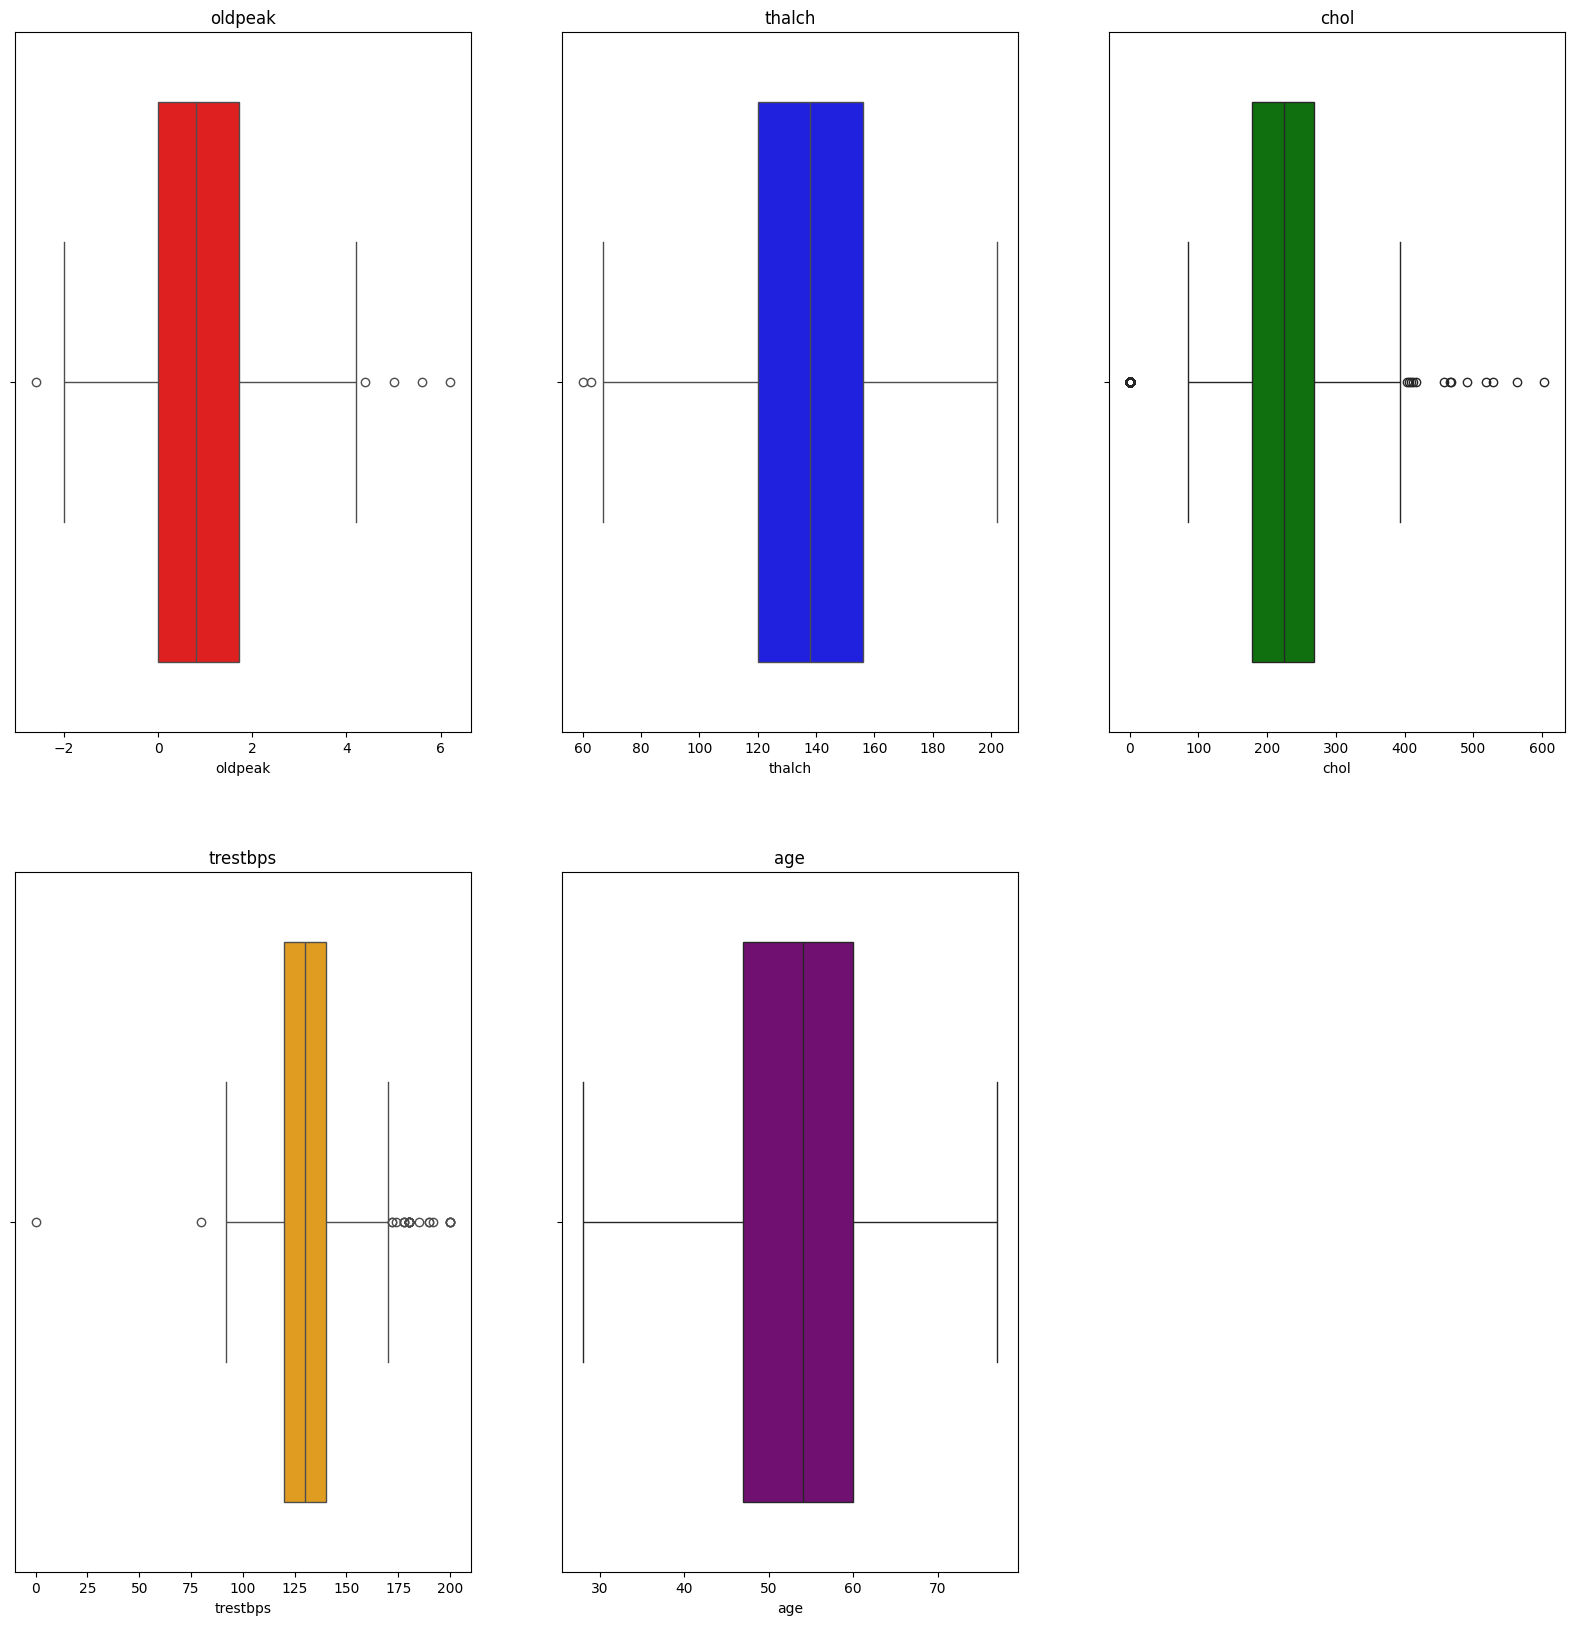

In [43]:
#Make a box plot of dataset:
plt.figure(figsize=(20,20))
color = ['red', 'blue', 'green', 'orange', 'purple']
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color=color[i])
    plt.title(col)
plt.show()    

In [44]:
#Make a boxplot with plotly of dataset of numerical_data to check the outlier:
fig = px.box(df, y= numeric_cols, title="Boxplot of numerical data")
fig.show()


In [45]:
#Check the row where trestbps is zero:
df.loc[df['trestbps'] == 0]
#Remove the outlier:
df = df.loc[df['trestbps'] != 0]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [47]:
#Check the row where trestbps is zero:
df.loc[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.00,True,1.296,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.00,False,3.000,flat,0.0,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,0.0,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,119.76,True,1.657,flat,0.0,reversable defect,1


## Machine Learning

In [48]:
#To check the columns:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [49]:
#Check the column of num:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is `num` which is predicted atribute. We will use this column to predict the `Heart Disease`.
The unique values in this column: [0, 1, 2 ,3, 4], which states that there are 5 types of heart disease:
* `0: no heart disease`
* `1: mild heart disease`
* `2: moderate heart disease`
* `3: severe heart disease`
* `4: critical heart disease`


Enlist all the models that will used to predict the heart disease. These models should be classifier for multi-class classification.
1. Logistic Regression
2. KNN
3. SVC
4. Decision Tree Classifier
5. XGBoost
6. Random Forest Classifier
7. NB
8. LightGBM
9. AdaBoost
10. GradientBoostClassifier

In [50]:
#Import the sklearn libraries for machine learning classification tasks:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#Import the metrics of classification:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
#Import the pipeline:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


In [51]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [52]:
#Split the data into X and y:
X = df.drop('num', axis=1)
y = df['num']
#Import the label encoder to change the category of num column:
le  = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
    else:
        pass
#Train_test_split the X and y:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Best Accuracy Model Prediction

In [53]:
#Model list:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBooster', XGBClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Support Vector Machine', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy='most_frequent')),
        #('Encoder', LabelEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform the cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Perform the mean score:
    mean_accuracy = scores.mean()

    # Fit the pipeline:
    pipeline.fit(X_train, y_train)

    # Make a prediction
    y_pred = pipeline.predict(X_test)

    # Calculate the Accuracy:
    accuracy = accuracy_score(y_test, y_pred)

    # Perform Metrics:
    print(name)
    print(f'Mean Accuracy: {mean_accuracy:.2f}')
    print(f'Test Accuracy: {accuracy:.2f}')
    print()

    # Best model accuracy:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f'Best Model: {best_model}')

Random Forest
Mean Accuracy: 0.67
Test Accuracy: 0.65

Gradient Boosting
Mean Accuracy: 0.66
Test Accuracy: 0.65

XGBooster
Mean Accuracy: 0.66
Test Accuracy: 0.64

Decision Tree
Mean Accuracy: 0.63
Test Accuracy: 0.64

Support Vector Machine
Mean Accuracy: 0.58
Test Accuracy: 0.58

KNN
Mean Accuracy: 0.58
Test Accuracy: 0.60

Naive Bayes
Mean Accuracy: 0.58
Test Accuracy: 0.51

Logistic Regression
Mean Accuracy: 0.53
Test Accuracy: 0.49

AdaBoost
Mean Accuracy: 0.61
Test Accuracy: 0.51

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


#### Model Prediction 

In [54]:
#Fit the model for data prediction:
model.fit(X_train, y_train)
#Make predictions on the test data
y_pred = model.predict(X_test)


In [55]:
X_test.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
72,73,62,1,0,0,120.0,267.0,0,1,99.0,1,1.8,1,2.0,2
120,121,48,1,0,0,130.0,256.0,1,0,150.0,1,0.0,2,2.0,2
296,297,59,1,0,0,164.0,176.0,1,0,90.0,0,1.0,1,2.0,0
314,315,34,1,1,1,98.0,220.0,0,1,150.0,0,0.0,2,0.0,1
710,711,67,1,2,3,145.0,0.0,0,0,125.0,0,0.0,1,2.0,1


In [59]:
#Predict the value:
y_pred = best_model.predict([[73, 62, 1, 0, 0, 120.0, 267.0, 0, 1, 99.0, 1, 1.8, 1, 2.0, 2]])
print(y_pred)

[1]


### Outputs:
- Minimum age of heart disease patient is 28 years old.
- Most of people heart diseases in the age of 53-55.
- Most of the male and female get diseases in the age of 54-55.
- Male disease percentage in the dataset is 78.91%.
- Female disease percentage in the dataset is 21.09%.
- Male precentage 274.23% more then Female.
- We have highest diseases people from Cleveland 304 and lowest is Switzerland 123.
   - We have highest number of female diseases Cleveland 97 and lowest is VA Long Beach 6.
   - Highest number of Male from Hungary (212) and Switzerland (113)

In [60]:
#Save the model:
import pickle
pickle.dump(model, open('pro_save_model.pkl', 'wb')) 